# <img src = 'https://www.apem.com/fr/img/apem-fr-logo-15076474841.jpg' style= 'width:425px;height:300px'/>    
# <img src = 'https://s3-eu-west-1.amazonaws.com/assets.atout-on-line.com/images/commerce/2013/FichesEcoles/tbs-logo-200.jpeg' style= 'width:425px;height:300px'/>
<h2> APEM BECOMES DATA DRIVEN PROJECT  </h2>  



<h2>Ala BOUSLAMA </h2>  



In [291]:
#Import libraries
import pandas as pd 
import numpy as np 
import seaborn as sb
from matplotlib import pyplot as plt
import os

In [293]:
#Read data
data = pd.read_excel('DATABASE XLS EXTRACT BASIC V2update - TRAIN.xlsx', sheet_name ="Extraction AX")


# Data Overview

In [294]:
data.head()

,OpportunityId,Status,Name,Subject,Country,SalesUnitId,ADUCategory,Product_Family,Application,Owner,...,OPENEDDATE,Opportunity_Number,PROGNOSISDAYS,DATAAREAID,BUSRELSEGMENT,CUSTSEGMENTID,CUSTSUBSEGMENTID,BUSRELSUBSEGMENTID,PrefixUK,ESTIMATEDREVENUE
0,OP-000081,Lost,CROUZET AUTOMATISMES SAS,"Crouzet 12147-6X778-09, 12167-6X778-09",France,SUD_EST,1-SWITCH,1-SWITCH,.,Sales Person 1,...,1900-01-01,OP-000081,180.0,fr02,NaN,Vehicles,NaN,NaN,,3144.0
1,OP-000121,Lost,SYSTEMES ATTUM,FR - Balance pesage peinture Membrane,France,CENTRE_IDF_1/2_EST,1-SWITCH,1-SWITCH,.,Sales Person 2,...,1900-01-01,OP-000121,180.0,fr02,NaN,Inst. Cons. Comp,NaN,NaN,,117500.0
2,OP-000122,Won,SCHNEIDER ELECTRIC,MEC // TELEGESTION RESEAU ELECTRIQUE,France,SUD_EST,NaN,NaN,.,Sales Person 1,...,1900-01-01,OP-000122,180.0,fr02,NaN,Ind. Automation,NaN,NaN,,12000.0
3,OP-000123,Lost,OMEGA FUSIBILI S.P.A.,IT - POWER ONE - 3500,Italie,EXPORT3,1-SWITCH,1-SWITCH,.,Sales Person 3,...,1900-01-01,OP-000123,180.0,fr02,NaN,Indirect Sales,NaN,NaN,,8160.0
4,OP-000124,Won,ERMEC SL,SP - NAD/SHAD- FP,Espagne,EXPORT1,NaN,NaN,.,Sales Person 4,...,1900-01-01,OP-000124,180.0,fr02,NaN,Indirect Sales,NaN,NaN,,120461.0


In [295]:
# List of columns
print ("\nFeatures : \n" ,data.columns.tolist())



Features : 
 ['OpportunityId', 'Status', 'Name', 'Subject', 'Country', 'SalesUnitId', 'ADUCategory', 'Product_Family', 'Application', 'Owner', 'Estimated Revenu', 'Prognosis', 'PrognosisDate', 'ProbabilityId', 'ProcessName', 'ADUOpportunityType', 'SegmentId', 'SubsegmentId', 'ADUSegmentId', 'ADUSubSegmentId', 'ADUEndCustomer', 'ADUBasicPartNumber', 'ADULifeOfProject', 'ADUEstimatedPriceEndCustomer', 'ADUPiecePotential', 'annualTotal', 'ADUCommentsRequest', 'ADUCommentsPMLocalValidation', 'AduLevelOfComplexity', 'ADUStrategicCustomer', 'AduPriorityMarket', 'Date_Created', 'OPENEDDATE', 'Opportunity_Number', 'PROGNOSISDAYS', 'DATAAREAID', 'BUSRELSEGMENT', 'CUSTSEGMENTID', 'CUSTSUBSEGMENTID', 'BUSRELSUBSEGMENTID', 'PrefixUK', 'ESTIMATEDREVENUE']


In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12222 entries, 0 to 12221
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   OpportunityId                 11779 non-null  object        
 1   Status                        11779 non-null  object        
 2   Name                          11779 non-null  object        
 3   Subject                       11779 non-null  object        
 4   Country                       11779 non-null  object        
 5   SalesUnitId                   8269 non-null   object        
 6   ADUCategory                   6848 non-null   object        
 7   Product_Family                6831 non-null   object        
 8   Application                   11769 non-null  object        
 9   Owner                         11027 non-null  object        
 10  Estimated Revenu              11779 non-null  float64       
 11  Prognosis                   

In [297]:
print('Our data set has {} Colonnes,and {} lignes '.format(data.columns.value_counts().count(),data.index.value_counts().count()))
print ("\nStandart Missing values :  ", data.isnull().sum().values.sum())# on a just check les missing value standard


Our data set has 42 Colonnes,and 12222 lignes 

Standart Missing values :   158544


<b> Number of null values per column and percentages ( Next code )

In [298]:
data.isnull().sum().sort_values(ascending = False)

CUSTSUBSEGMENTID                12222
BUSRELSUBSEGMENTID              11876
SubsegmentId                    11876
ADUCommentsPMLocalValidation    11307
ADUSubSegmentId                 11064
BUSRELSEGMENT                   10197
ADUEndCustomer                   9531
AduLevelOfComplexity             8027
ADUBasicPartNumber               7874
ADUCommentsRequest               7414
SegmentId                        5583
CUSTSEGMENTID                    5583
Product_Family                   5391
ADUCategory                      5374
PROGNOSISDAYS                    4462
PrognosisDate                    4462
ProcessName                      4268
Prognosis                        4126
SalesUnitId                      3953
ADUSegmentId                     3446
Owner                            1195
Application                       453
Name                              443
Estimated Revenu                  443
ProbabilityId                     443
Status                            443
Country     

In [299]:
missing_values_non_standard = ["n/a", "na", " "]
df = pd.read_excel('DATABASE XLS EXTRACT BASIC V2update - TRAIN.xlsx', sheet_name ="Extraction AX",na_values=missing_values_non_standard)# regardons leurs pourcentage dans notre data set 
total_missing_non_standard=df.isnull().sum().sort_values(ascending=False)
percent_non_standard = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_values_non_standard = pd.concat([total_missing_non_standard, percent_non_standard], axis=1, keys=['Total_missing', 'Percent'])
missing_values_non_standard

,Total_missing,Percent
CUSTSUBSEGMENTID,12222,1.000000
BUSRELSUBSEGMENTID,11876,0.971690
SubsegmentId,11876,0.971690
ADUCommentsPMLocalValidation,11307,0.925135
ADUSubSegmentId,11064,0.905253
BUSRELSEGMENT,10197,0.834315
ADUEndCustomer,9531,0.779823
AduLevelOfComplexity,8027,0.656766
ADUBasicPartNumber,7874,0.644248
PrefixUK,7695,0.629602


<b> Correlation between the variables

In [300]:
data.corr()

,Estimated Revenu,ProbabilityId,ADULifeOfProject,ADUEstimatedPriceEndCustomer,ADUPiecePotential,annualTotal,PROGNOSISDAYS,CUSTSUBSEGMENTID,ESTIMATEDREVENUE
Estimated Revenu,1.000000,0.022734,0.337520,0.014167,0.791738,0.905341,0.046642,NaN,0.097083
ProbabilityId,0.022734,1.000000,0.104635,0.033877,0.009785,0.035379,-0.214237,NaN,0.015885
ADULifeOfProject,0.337520,0.104635,1.000000,0.010295,0.015978,0.048437,-0.016122,NaN,0.019770
ADUEstimatedPriceEndCustomer,0.014167,0.033877,0.010295,1.000000,-0.002124,0.034353,0.006989,NaN,0.002694
ADUPiecePotential,0.791738,0.009785,0.015978,-0.002124,1.000000,0.770398,0.002664,NaN,0.027386
annualTotal,0.905341,0.035379,0.048437,0.034353,0.770398,1.000000,0.067328,NaN,0.106224
PROGNOSISDAYS,0.046642,-0.214237,-0.016122,0.006989,0.002664,0.067328,1.000000,NaN,0.033740
CUSTSUBSEGMENTID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESTIMATEDREVENUE,0.097083,0.015885,0.019770,0.002694,0.027386,0.106224,0.033740,NaN,1.000000


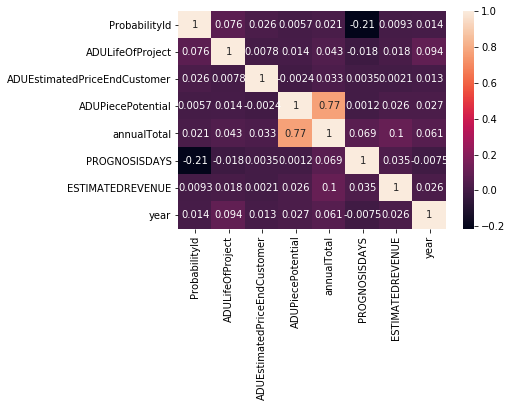

In [320]:
sb.heatmap(data.corr(),annot=True)

In [319]:
data.describe()

,ProbabilityId,ADULifeOfProject,ADUEstimatedPriceEndCustomer,ADUPiecePotential,annualTotal,PROGNOSISDAYS,ESTIMATEDREVENUE,year
count,9285.000000,9285.000000,9285.000000,9.285000e+03,9.285000e+03,7161.000000,9.728000e+03,9285.000000
mean,29.290253,2.558966,91.309144,9.685113e+03,4.137987e+04,189.792627,6.963055e+04,2016.850188
std,29.486984,11.037337,1360.451369,2.572681e+05,3.456949e+05,140.240126,1.253526e+06,1.842770
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,15.000000,0.000000e+00,2012.000000
25%,10.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,90.000000,1.500000e+03,2016.000000
50%,20.000000,0.000000,2.000000,1.000000e+02,0.000000e+00,180.000000,1.000000e+04,2017.000000
75%,50.000000,5.000000,15.000000,1.500000e+03,1.650000e+04,270.000000,4.600000e+04,2018.000000
max,100.000000,1000.000000,96000.000000,2.400000e+07,2.400000e+07,720.000000,1.200000e+08,2020.000000


# <b> Data Cleaning / Enrichment

In [302]:
 #Drop useless Colomun
data.drop(['CUSTSUBSEGMENTID', 'ADUCommentsRequest','SubsegmentId', 'ADUBasicPartNumber' , 'PrefixUK' , 'Estimated Revenu','BUSRELSUBSEGMENTID','Opportunity_Number'], axis=1, inplace=True)


In [303]:
#Fill in non values in ESTIMATED REVENUE column with the mean of the column
data.loc[data.ESTIMATEDREVENUE.isna()==True,'ESTIMATEDREVENUE']=data.ESTIMATEDREVENUE.mean()
data.ESTIMATEDREVENUE.isna().sum()

0

In [304]:
#Fill in non values in AduLevelOfComplexity column with the Unknown 
data['AduLevelOfComplexity'].fillna('Unknown', inplace=True)
data['AduLevelOfComplexity'].describe()

count       12222
unique          5
top       Unknown
freq         8027
Name: AduLevelOfComplexity, dtype: object

In [305]:
#Fill in non values in ADUEndCustomer column with  Other 

data['ADUEndCustomer'].fillna('Other', inplace=True)
data['ADUEndCustomer'].describe()

count     12222
unique     1475
top       Other
freq       9531
Name: ADUEndCustomer, dtype: object

In [309]:
# Removing rows that have been created before 2017 and are still active in the Status column 
data = data.drop(data[(data['Status'] == 'Active') & (df['Date_Created'] < '2017-01-01')].index)
data.Status.describe()

count     9285
unique       5
top       Lost
freq      3730
Name: Status, dtype: object

In [310]:
#Filling in non values in category column with unknown
data['ADUCategory'].fillna('Unkown', inplace=True)
data.head()

,OpportunityId,Status,Name,Subject,Country,SalesUnitId,ADUCategory,Product_Family,Application,Owner,...,AduLevelOfComplexity,ADUStrategicCustomer,AduPriorityMarket,Date_Created,OPENEDDATE,PROGNOSISDAYS,DATAAREAID,BUSRELSEGMENT,CUSTSEGMENTID,ESTIMATEDREVENUE
0,OP-000081,Lost,CROUZET AUTOMATISMES SAS,"Crouzet 12147-6X778-09, 12167-6X778-09",France,SUD_EST,1-SWITCH,1-SWITCH,.,Sales Person 1,...,Level 3 - Heavy product modification,No,Non Strategic,2012-05-23,1900-01-01,180.0,fr02,NaN,Vehicles,3144.0
1,OP-000121,Lost,SYSTEMES ATTUM,FR - Balance pesage peinture Membrane,France,CENTRE_IDF_1/2_EST,1-SWITCH,1-SWITCH,.,Sales Person 2,...,Unknown,No,Non Strategic,2012-09-03,1900-01-01,180.0,fr02,NaN,Inst. Cons. Comp,117500.0
2,OP-000122,Won,SCHNEIDER ELECTRIC,MEC // TELEGESTION RESEAU ELECTRIQUE,France,SUD_EST,Unkown,NaN,.,Sales Person 1,...,Unknown,No,Non Strategic,2012-09-06,1900-01-01,180.0,fr02,NaN,Ind. Automation,12000.0
3,OP-000123,Lost,OMEGA FUSIBILI S.P.A.,IT - POWER ONE - 3500,Italie,EXPORT3,1-SWITCH,1-SWITCH,.,Sales Person 3,...,Unknown,No,Non Strategic,2012-09-06,1900-01-01,180.0,fr02,NaN,Indirect Sales,8160.0
4,OP-000124,Won,ERMEC SL,SP - NAD/SHAD- FP,Espagne,EXPORT1,Unkown,NaN,.,Sales Person 4,...,Unknown,No,Non Strategic,2012-09-06,1900-01-01,180.0,fr02,NaN,Indirect Sales,120461.0


In [311]:
#Here we wreated the year column for data vis further use
data['year'] = pd.DatetimeIndex(data['Date_Created']).year
data['year']

0        2012.0
1        2012.0
2        2012.0
3        2012.0
4        2012.0
          ...  
12217    2020.0
12218    2020.0
12219    2020.0
12220    2020.0
12221    2020.0
Name: year, Length: 9728, dtype: float64

Here, we will export the data in order to use it in Dataiku and tableau prep for more data  and enrichment (30 % of the cleaning is already done in Python , We decided to move to other tools in order to gain time )


In [314]:
#Export data
Abracadabra = data.to_csv(r'C:\Users\33760\Desktop\salut\Abracadabra.csv', index = False)


After finishing the cleaning and enrichment with Dataiku and Tableau Prep, We will read our cleaned and prepared data 

In [315]:
Data_cleaned = pd.read_csv('Abracadabraa_prepared_cleaned (2).csv', sep=',')
Data_cleaned.head()


,OpportunityId,Status,Name,Subject,Country,SalesUnitId,ADUCategory,Product_Family,Application,Owner,...,ADUStrategicCustomer,AduPriorityMarket,Date_Created,OPENEDDATE,Opportunity_Number,PROGNOSISDAYS,DATAAREAID,ESTIMATEDREVENUE,year,CPI Duration
0,OP-000081,Lost,CROUZET AUTOMATISMES SAS,"Crouzet 12147-6X778-09, 12167-6X778-09",France,SUD_EST,1-SWITCH,1-SWITCH,generic,Sales Person 1,...,No,Non Strategic,2012-05-23,1900-01-01,OP-000081,180.0,fr02,3144.0,2012.0,8.0
1,OP-000121,Lost,SYSTEMES ATTUM,FR - Balance pesage peinture Membrane,France,CENTRE_IDF_1/2_EST,1-SWITCH,1-SWITCH,generic,Sales Person 2,...,No,Non Strategic,2012-09-03,1900-01-01,OP-000121,180.0,fr02,117500.0,2012.0,8.0
2,OP-000122,Won,SCHNEIDER ELECTRIC,MEC // TELEGESTION RESEAU ELECTRIQUE,France,SUD_EST,Unkown,Others,generic,Sales Person 1,...,No,Non Strategic,2012-09-06,1900-01-01,OP-000122,180.0,fr02,12000.0,2012.0,8.0
3,OP-000123,Lost,OMEGA FUSIBILI S.P.A.,IT - POWER ONE - 3500,Italy,EXPORT3,1-SWITCH,1-SWITCH,generic,Sales Person 3,...,No,Non Strategic,2012-09-06,1900-01-01,OP-000123,180.0,fr02,8160.0,2012.0,8.0
4,OP-000124,Won,ERMEC SL,SP - NAD/SHAD- FP,Spain,EXPORT1,Unkown,Others,generic,Sales Person 4,...,No,Non Strategic,2012-09-06,1900-01-01,OP-000124,180.0,fr02,120461.0,2012.0,8.0


In [317]:
#Here , we just did some data cleaning in Country column
data['country'] = data.apply(lambda row : 
                            'France' if row['SalesUnitId'] == 'OUEST'
                            else row['Country'] , axis=1)

data['country'] = data.apply(lambda row : 
                            'France' if row['SalesUnitId'] == 'SUD_EST'
                            else row['Country'] , axis=1)

data['country'] = data.apply(lambda row : 
                            'France' if row['SalesUnitId'] == 'NORD_1/2_EST'
                            else row['Country'] , 
                                     axis=1)
data['country'] = data.apply(lambda row : 
                            'France' if row['SalesUnitId'] == 'NORD_1/2_EST'
                            else row['Country'] , 
                                     axis=1)
data['country'] = data.apply(lambda row : 
                            'France' if row['SalesUnitId'] == 'CENTRE_IDF_1/2_EST'
                            else row['Country'] , 
                                     axis=1)
data['country'] = data.apply(lambda row : 
                            'France' if row['SalesUnitId'] == 'SUD_OUEST'
                            else row['Country'] , 
                                     axis=1)

data.country.describe()

count       9285
unique        47
top       France
freq        3338
Name: country, dtype: object

# DATA VISUALISATION

# Status

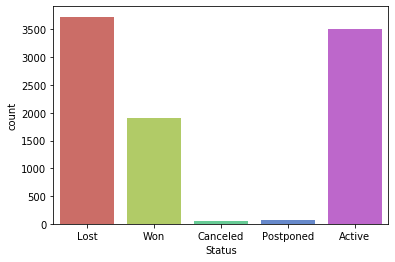

In [326]:
sb.countplot(x='Status' , data=data , palette='hls')
plt.show()

THe number of lost Processes is the highest one ( double of Won ) than it comes the Active ones 


In [325]:
#Create df4 filtered by countries and year (countries are the most important countries for APEM and created  after 2017) FOR FURTHER DATA VIS USE
df3 = Data_cleaned[ (Data_cleaned.Country =='Belgium')|  (Data_cleaned.Country =='France') | (Data_cleaned.Country =='United Kingdom')   |      (Data_cleaned.Country =='Germany')        |     (Data_cleaned.Country ==' Italy')        |    (Data_cleaned.Country =='Belgium')             |    (Data_cleaned.Country =='Netherlands')   |(Data_cleaned.Country =='Spain')]
df4=df3[(df3.year >= 2017) ]
df4.head(3)

,OpportunityId,Status,Name,Subject,Country,SalesUnitId,ADUCategory,Product_Family,Application,Owner,...,ADUStrategicCustomer,AduPriorityMarket,Date_Created,OPENEDDATE,Opportunity_Number,PROGNOSISDAYS,DATAAREAID,ESTIMATEDREVENUE,year,CPI Duration
3034,OP-004301,Lost,APEM GMBH,Würth: Suite OP4220 - AV031003C240T+Cable leon...,Germany,SUBSIDIARY,1-SWITCH,1-SWITCH,generic,Sales Person 14,...,No,Standard,2017-01-02,2017-01-02,OP-004301,360.0,fr02,25000.0,2017.0,3.0
3035,OP-004303,Lost,APEM COMPONENTS LTD,A01ES-DM sans top,United Kingdom,SUBSIDIARY,1-SWITCH,1-SWITCH,generic,Sales Person 15,...,No,Standard,2017-01-03,2017-01-03,OP-004303,360.0,fr02,6000.0,2017.0,3.0
3036,OP-004304,Won,MATROT EQUIPEMENT,FP avec marquage ISO 7000-1389,France,NORD_1/2_EST,1-SWITCH,1-SWITCH,generic,Sales Person 7,...,No,Non Strategic,2017-01-03,2017-01-03,OP-004304,180.0,fr02,2000.0,2017.0,3.0


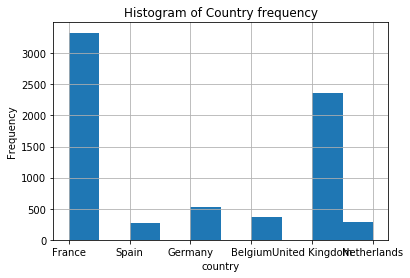

In [324]:
df3.Country.hist()
plt.title('Histogram of Country frequency')
plt.xlabel('country')
plt.ylabel('Frequency')
plt.savefig('hist_country_freq')

France has the highest number of Opportunities ( almost the third of the dataset ) than it comes U Kinkdom and Netherland 

Text(0, 0.5, 'Country')

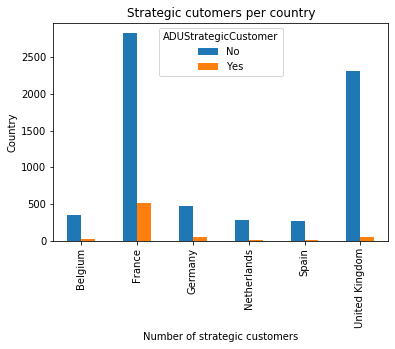

In [327]:
pd.crosstab(df3.Country,df3.ADUStrategicCustomer).plot(kind='bar')
plt.title('Strategic cutomers per country')
plt.xlabel('Number of strategic customers')
plt.ylabel('Country')

France has the highest number of non strategic customers and strategic ones  ( more than 2500 non strategic and about 500 strategic ) than it comes United Kingdom with about 2300 non strategic 

<B> Number of opportunities per Status per  category

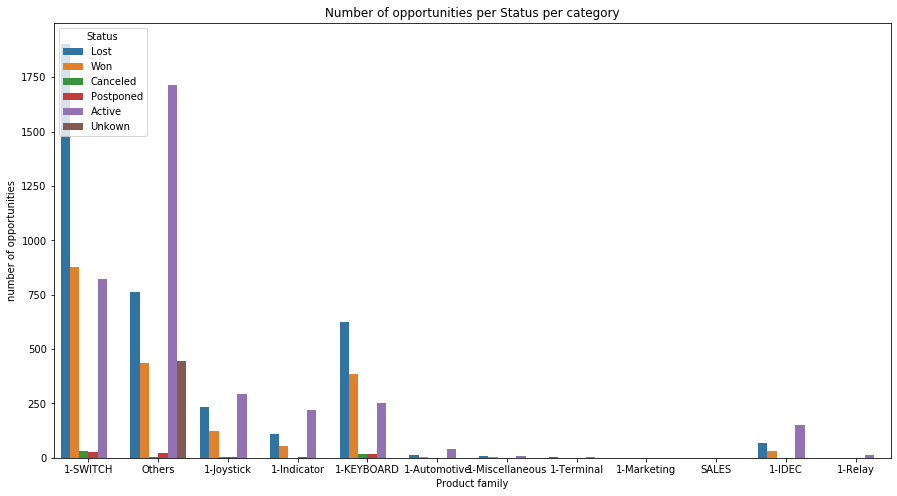

In [328]:
plt.figure( figsize = (15, 8) )
chart=sb.countplot(data=Data_cleaned, x='Product_Family', hue='Status')
chart.set_title('Number of opportunities per Status per category')
chart.set_xlabel('Product family')
chart.set_ylabel('number of opportunities')
plt.show()

The highest frequency for lost  is for the Lost Switch opportunities with more than 1800 , and for the won Status SWITCH also has the highest number of already gained opportunities 

<B> Estimated revenue per  category ( for the 4 main categories ) 

In [331]:
# Filtering our data to take just the most important categories for APEM 
df2 = Data_cleaned[ (Data_cleaned.ADUCategory == '1-SWITCH')  | (Data_cleaned.ADUCategory == '1-KEYBOARD') |(Data_cleaned.ADUCategory == '1-Joystick')  |(Data_cleaned.ADUCategory == '1-Indicator') ]
df2.head()

,OpportunityId,Status,Name,Subject,Country,SalesUnitId,ADUCategory,Product_Family,Application,Owner,...,ADUStrategicCustomer,AduPriorityMarket,Date_Created,OPENEDDATE,Opportunity_Number,PROGNOSISDAYS,DATAAREAID,ESTIMATEDREVENUE,year,CPI Duration
0,OP-000081,Lost,CROUZET AUTOMATISMES SAS,"Crouzet 12147-6X778-09, 12167-6X778-09",France,SUD_EST,1-SWITCH,1-SWITCH,generic,Sales Person 1,...,No,Non Strategic,2012-05-23,1900-01-01,OP-000081,180.0,fr02,3144.0,2012.0,8.0
1,OP-000121,Lost,SYSTEMES ATTUM,FR - Balance pesage peinture Membrane,France,CENTRE_IDF_1/2_EST,1-SWITCH,1-SWITCH,generic,Sales Person 2,...,No,Non Strategic,2012-09-03,1900-01-01,OP-000121,180.0,fr02,117500.0,2012.0,8.0
3,OP-000123,Lost,OMEGA FUSIBILI S.P.A.,IT - POWER ONE - 3500,Italy,EXPORT3,1-SWITCH,1-SWITCH,generic,Sales Person 3,...,No,Non Strategic,2012-09-06,1900-01-01,OP-000123,180.0,fr02,8160.0,2012.0,8.0
16,OP-000138,Lost,ENIKA CZ S.R.O.,CZ - Official Elec - AS39S0200,Czechia,EXPORT2,1-SWITCH,1-SWITCH,generic,Sales Person 5,...,No,Non Strategic,2012-12-12,1900-01-01,OP-000138,180.0,fr02,8880.0,2012.0,8.0
22,OP-000144,Lost,REDISLOGAR S.A.,SP - CAF - AV9SLD2781002,Spain,EXPORT1,1-SWITCH,1-SWITCH,generic,Sales Person 4,...,No,Non Strategic,2012-12-12,1900-01-01,OP-000144,180.0,fr02,8715.0,2012.0,8.0


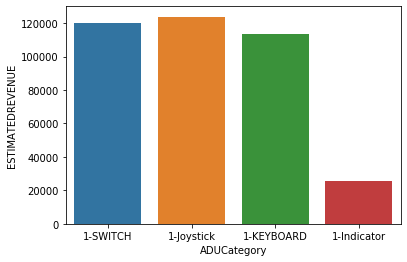

In [332]:
x =sb.barplot(data=df2, x='ADUCategory', y='ESTIMATEDREVENUE', ci=None)


For the revenue , SWITCH , Joystick and Keybiard have almost the same revenue with a total almost 120 000$

# Evolution of Estimated revenue per year in the most important countries for APEM

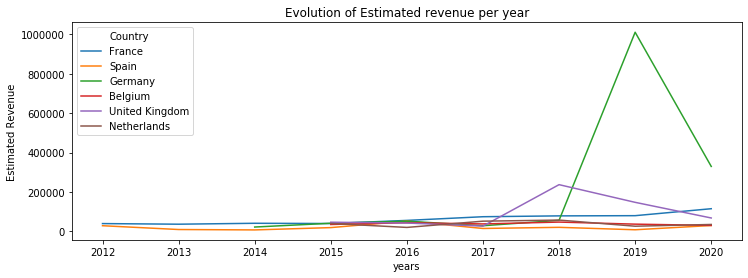

In [333]:

# ploting a graph of ESTIMATEDREVENUE evolution  per year per country.
Sales_per_region_peryear = df4.groupby(['year','Country']).ESTIMATEDREVENUE.sum().reset_index()
plt.figure( figsize = (12,4 ))
chart=sb.lineplot(data=df3, x='year', hue='Country', y='ESTIMATEDREVENUE', ci=None)
chart.set_title('Evolution of Estimated revenue per year')
chart.set_xlabel('years')
chart.set_ylabel('Estimated Revenue')
plt.show()


<b> As we can see , all the estimated revenues are stable ( about 80000 $ in all countries ) except for Germany, the estimated revenue  was stable till 2018 to multiply more than 10 times from 2018 to 2019 , Than it decreased from 2019 ( divided by malmost 3 ) In addition, Uni Kingdom function has the same shape ( increased in 2017 than decrease it 2018 ) 
==) In 2018 , APEM surely focused  on the German market much more than other markets that's why we have the decrease of majority of revenue in other countries. However , Fransh Market for APEM is improving since 2019 ( Second best EStimated revenue is in France in 2020 ) 

# Prognosis days of each Priority Market per country

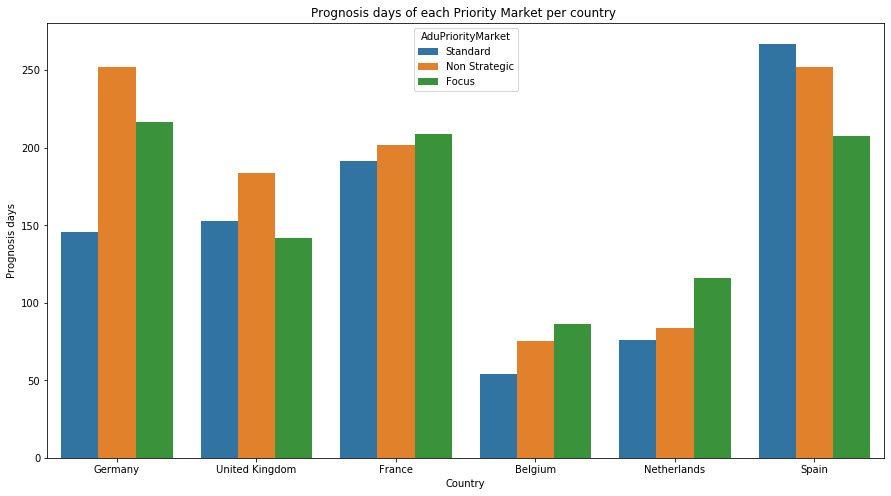

In [334]:
plt.figure( figsize = (15, 8) )
chart=sb.barplot(data=df4, x='Country', hue='AduPriorityMarket', y='PROGNOSISDAYS', ci=None)
chart.set_title('Prognosis days of each Priority Market per country ')
chart.set_xlabel('Country')
chart.set_ylabel('Prognosis days')
plt.show()

In Spain for example which represents one of the most important market for APEM , the highest prognosis days corresponds to the standard market.
In France, the highest prognosis days corresponds Focus market


# Evolution of probability sucess per prognosis days

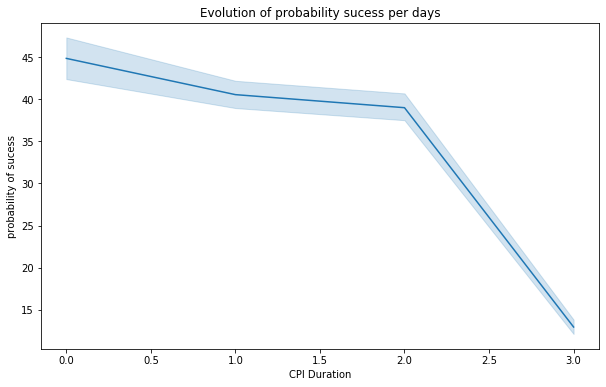

In [346]:
plt.figure( figsize = (10, 6))
chart=sb.lineplot(data=df4, x='CPI Duration', y='ProbabilityId')
chart.set_title('Evolution of probability sucess per days')
chart.set_xlabel('CPI Duration')
chart.set_ylabel('probability of sucess')
plt.show()

As we can, when the CPI increases from 1 to 3 years the probabilty sucess decreases ( important decrease of prob success for the CPI that are older than 2 years )

# <b> SEGMENTID Analysis 

<b> Number of Opportunities per segment

In [347]:
NumberofOpp_per_segment = df3.groupby(['SegmentId']).OpportunityId.count().reset_index()
NumberofOpp_per_segment.rename(columns={'OpportunityId':'count'}, inplace=True)
print(NumberofOpp_per_segment)

              SegmentId  count
0                   AgM    509
1            Automotive    191
2         Communication     79
3                   CtR     30
4                   DgE    529
5                Divers     15
6       Ind. Automation    300
7        Indirect Sales    889
8      Inst. Cons. Comp    345
9                   MaH    406
10              Medical    155
11            Other DgE     20
12  Other Electr. Appli    790
13       Other Mil.Aero     84
14   Other applications    480
15             Security    220
16               Unkown   1662
17             Vehicles    440


The highest number of opportunities is for indirect sales segment with 889 than it comes the electric application

Text(0, 0.5, 'Number of opportunities')

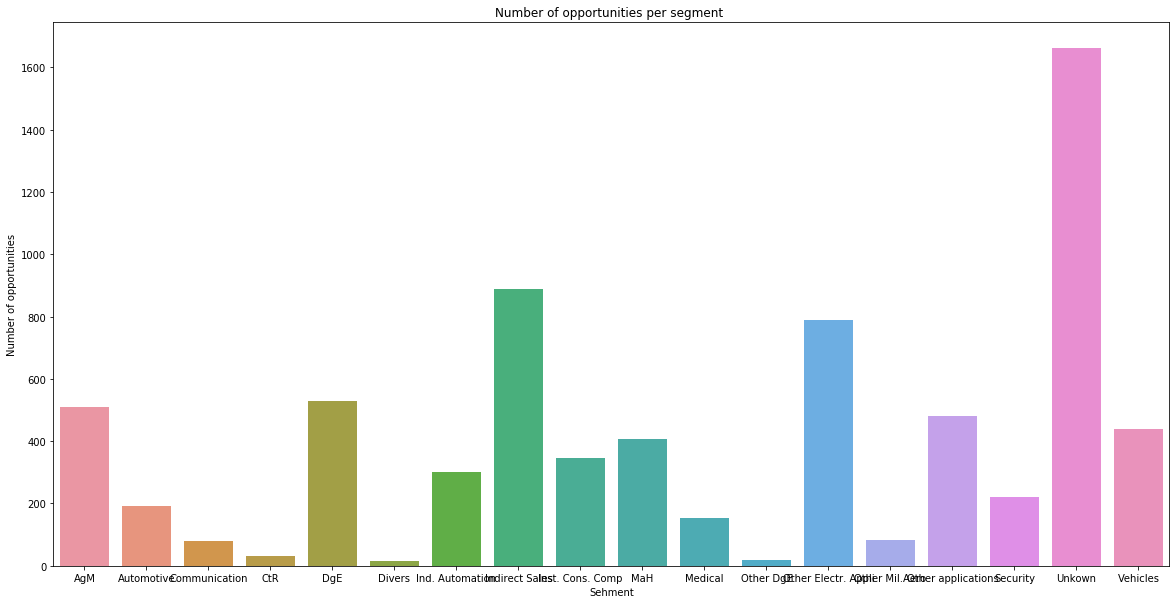

In [348]:
plt.figure( figsize = (20, 10) )
chart=sb.barplot(data=NumberofOpp_per_segment, x='SegmentId', y='count', ci=None)
chart.set_title('Number of opportunities per segment ')
chart.set_xlabel('Sehment')
chart.set_ylabel('Number of opportunities')

<B> Mean_revenue_and_mean_prob_of_sucess_PER_SEGMENT

In [220]:
mean_revenue_and_mean_prob_of_sucess_PER_SEGMENT= Data_cleaned.groupby('SegmentId').agg(mean_prob_sucess=('ProbabilityId', 'mean'), mean_Revenue=('ESTIMATEDREVENUE', 'mean')).reset_index()
mean_sum_shoe_type

,SegmentId,mean_prob_sucess,mean_Revenue
0,AgM,32.720971,84575.386482
1,Automotive,34.786730,234531.900474
2,Communication,30.232558,22466.244186
3,CtR,63.953488,173231.395349
4,DgE,32.582026,82580.233951
5,Divers,19.333333,14024.666667
6,Ind. Automation,34.559524,52783.152381
7,Indirect Sales,29.185220,68028.673520
8,Inst. Cons. Comp,35.907821,35094.988827
9,MaH,39.922631,78936.632495


Here we have the mean prob of sucess of each segment with the mean estimated revenue ( CtR has the highest mean of prob sucess )

<b> The goal of the next part is to predict the Status of our processes using Machine learning algorithms like Logitic regression and Gradient Boost 





# Prediction of Status using KNN

In [351]:
# Here , I imported train_test_split in order to split my dataset to train and test for my ML algorithms
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


In [352]:
# Fit our model 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [354]:
# Aplly the Kneighbors for our Train data
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [355]:
# Predict our Test data
y_pred = classifier.predict(X_test)


In [356]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[730   1 136   0  37   0]
 [  2   0   5   0   1   0]
 [114   3 383   0  57   0]
 [  5   0   3   0   2   0]
 [ 85   1 130   0  78   0]
 [  0   0   0   0   0  61]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       904
           1       0.00      0.00      0.00         8
           2       0.58      0.69      0.63       557
           3       0.00      0.00      0.00        10
           4       0.45      0.27      0.33       294
           5       1.00      1.00      1.00        61

    accuracy                           0.68      1834
   macro avg       0.47      0.46      0.46      1834
weighted avg       0.67      0.68      0.67      1834



Accuracy is 0.68 Not bad 

# Prediction of Status using Logistic regression and Gradient Boost

In [368]:
from sklearn.ensemble import AdaBoostClassifier
adamodel= AdaBoostClassifier()
adamodel.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [359]:
from sklearn.ensemble import GradientBoostingClassifier
gradmodel=GradientBoostingClassifier()
gradmodel.fit(X_train,y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [361]:
from sklearn.metrics import roc_auc_score


In [372]:
models ={'Logistic Regression':logmodel,'gradient boost':gradmodel,'Kneighbors':classifier }


In [373]:
evaluation=pd.DataFrame(columns=['accuracy_score'],index=models.keys())
def testingfunc(X_test,y_test,models,lscore='accuracy_score',auc='AUC-ROC_score'):
    for label,model in models.items():
        score=str(round(model.score(X_test,y_test),2))
        evaluation.loc[label,lscore]=score
    return evaluation


In [374]:
testingfunc(X_test,y_test,models=models,lscore='accuracy_score',auc='AUC-ROC_score')


,accuracy_score
Logistic Regression,0.66
gradient boost,0.73
Kneighbors,0.68


# Testing our MOdel 